<a href="https://colab.research.google.com/github/Plagistus/PythonAufgabe02/blob/master/Neuronal_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

In [4]:
iris = datasets.load_iris()

In [5]:
X = iris.data[:, :2]  # sepal width and sepal length
y = iris.target  # classes (die Blumen halt)

#setting the "quality" of the plots
h= .02

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=40)

In [7]:
# normalize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# show that we have only 3 classes, e.g. the Blumes
print("Unique labes: {0}".format(np.unique(y)))

Unique labes: [0 1 2]


Classifier predict: [0 1 1 2 1 1 2 1 1 0 1 0 0 2 1]
Neuronen: 1, Score: 80.0 %
 Hier ist Joy (85215, 2)


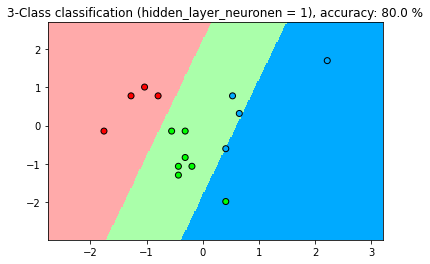

Classifier predict: [0 1 2 2 1 2 1 1 1 0 1 0 0 1 1]
Neuronen: 3, Score: 93.33 %
 Hier ist Joy (85215, 2)


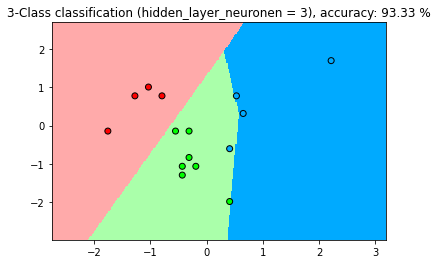

Classifier predict: [0 1 2 2 1 2 1 1 1 0 1 0 0 1 1]
Neuronen: 5, Score: 93.33 %
 Hier ist Joy (85215, 2)


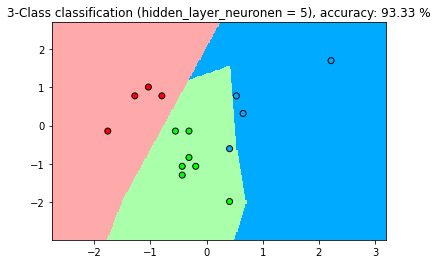

In [15]:
#array for three different neurons (hidden layers)
neuron_range = [1, 3, 5]

cmap_bold = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_light = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])


for n in neuron_range:
    classifier = MLPClassifier(solver='lbfgs', # standard is ada, but that is only for big datasets, more than 1000 or so? further research required
                               max_iter=200, 
                               hidden_layer_sizes=n, 
                               learning_rate_init=.1, 
                               random_state=40).fit(X_train, y_train)
    
    #Brauch ich das wirklich, was tut das?!
    print(f"Classifier predict: {classifier.predict(X_test)}")
    print(f"Neuronen: {n}, Score: {round(classifier.score(X_test, y_test) * 100,2)} %")
    
    #calculate min, max and limits
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


    #Put the result into a color plot
    snooby = np.c_[xx.ravel(), yy.ravel()]
    print(f" Hier ist Joy {snooby.shape}")
    pred = classifier.predict(snooby)
   
    #Hintergrundfarbe
    pred = pred.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, pred, cmap=cmap_bold, shading='auto')

    #Farbe und ausgabe für die Points
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_light, edgecolors='#000000')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(
        f"3-Class classification (hidden_layer_neuronen = {n}), accuracy: {round(classifier.score(X_test, y_test) * 100, 2)} %")
    plt.show()